In [74]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from pandas import DataFrame as df
import os
import sys
import datetime

sys.path.append(os.path.abspath("../"))
from shibaer import util, features
pd.options.display.float_format = "{:.2f}".format

tprint = lambda s: print('\n--- %s ---' %s)
pprint=lambda i: '%i (%.2f)' %(i,float(i)/len(fraud_events))
hour_diff = lambda i:i.total_seconds()/360 if type(i) is not None else i

def stack_plot(data, index_axis, stack_var='age',title=None, ylim=None):
    if title is None:
        title=stack_var +' by ' + index_axis.dtype
    data[stack_var].groupby(index_axis).value_counts().unstack().plot(kind='bar', 
                                                                      stacked=True, figsize=(20,5), title=title, ylim=ylim)
thumbdrive = 'KINGSTON'
data_dir = 'ER'
data = util.load_pickle_files(thumbdrive, data_dir, is_small=False)
data_with_targets = features.add_death_columns(data)
target_variables = [d for d in data_with_targets.columns if 'T_' in d]
target_variables

data


Found the following pickle files:  ['2013 PROC 4.8.18.pkl', '2014 PROC 4.8.18.pkl', '2015 PROC 4.8.18.pkl', '2016 PROC 4.8.18.pkl', '2017 PROC 4.8.18.pkl', 'small_pickle.pkl']
Loading : 2013 PROC 4.8.18.pkl
Loading : 2014 PROC 4.8.18.pkl
Loading : 2015 PROC 4.8.18.pkl
Loading : 2016 PROC 4.8.18.pkl
Loading : 2017 PROC 4.8.18.pkl
Loading : small_pickle.pkl
Finished loading data
Total number of rows:  605673


['T_is_dead',
 'T_release_date',
 'T_total_time_hospital',
 'T_mortality_ER',
 'T_mortality_hospitalization',
 'T_mortality2d',
 'T_mortality30d',
 'T_mortality60d']

In [136]:
def plot_events_by_time(death_events, by_time, stack_var = ''):
    death_events.sort_values(by=by_time)
    times = pd.DatetimeIndex(death_events[by_time])
    stack_plot(death_events, index_axis = [times.month,times.year], 
               stack_var=stack_var, title = 'Death %s by %s month' %(stack_var,by_time))
    print('')

84723
24678

--- Relative time of death after T_release_date (uniqe id_coded) 48-h  ---


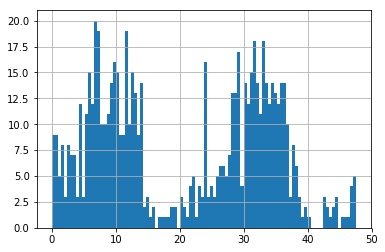

In [133]:
import datetime


death_data = data_with_targets.loc[data_with_targets.T_is_dead]
print(len(death_data))
death_data = death_data.sort_values('admission_date_min').drop_duplicates(subset =['id_coded'], keep='last')
print(len(death_data))


def plot_time_of_death_from(time_from='admission_date_min', drop_negatives=True, as_time='D', max_period= 1200):
    death_delta= (death_data.death_date - death_data[time_from])/np.timedelta64(1,as_time)
    if drop_negatives:
        death_delta = death_delta.loc[death_delta>0] #remove negative death deltas
    death_delta.loc[death_delta<=max_period].hist(bins=100)
    #death_days_from_admission.hist()
    tprint('Relative time of death after %s (uniqe id_coded) %i-%s '%(time_from,max_period,as_time))
    return death_delta


dd=plot_time_of_death_from(time_from='T_release_date',max_period=48, as_time='h')


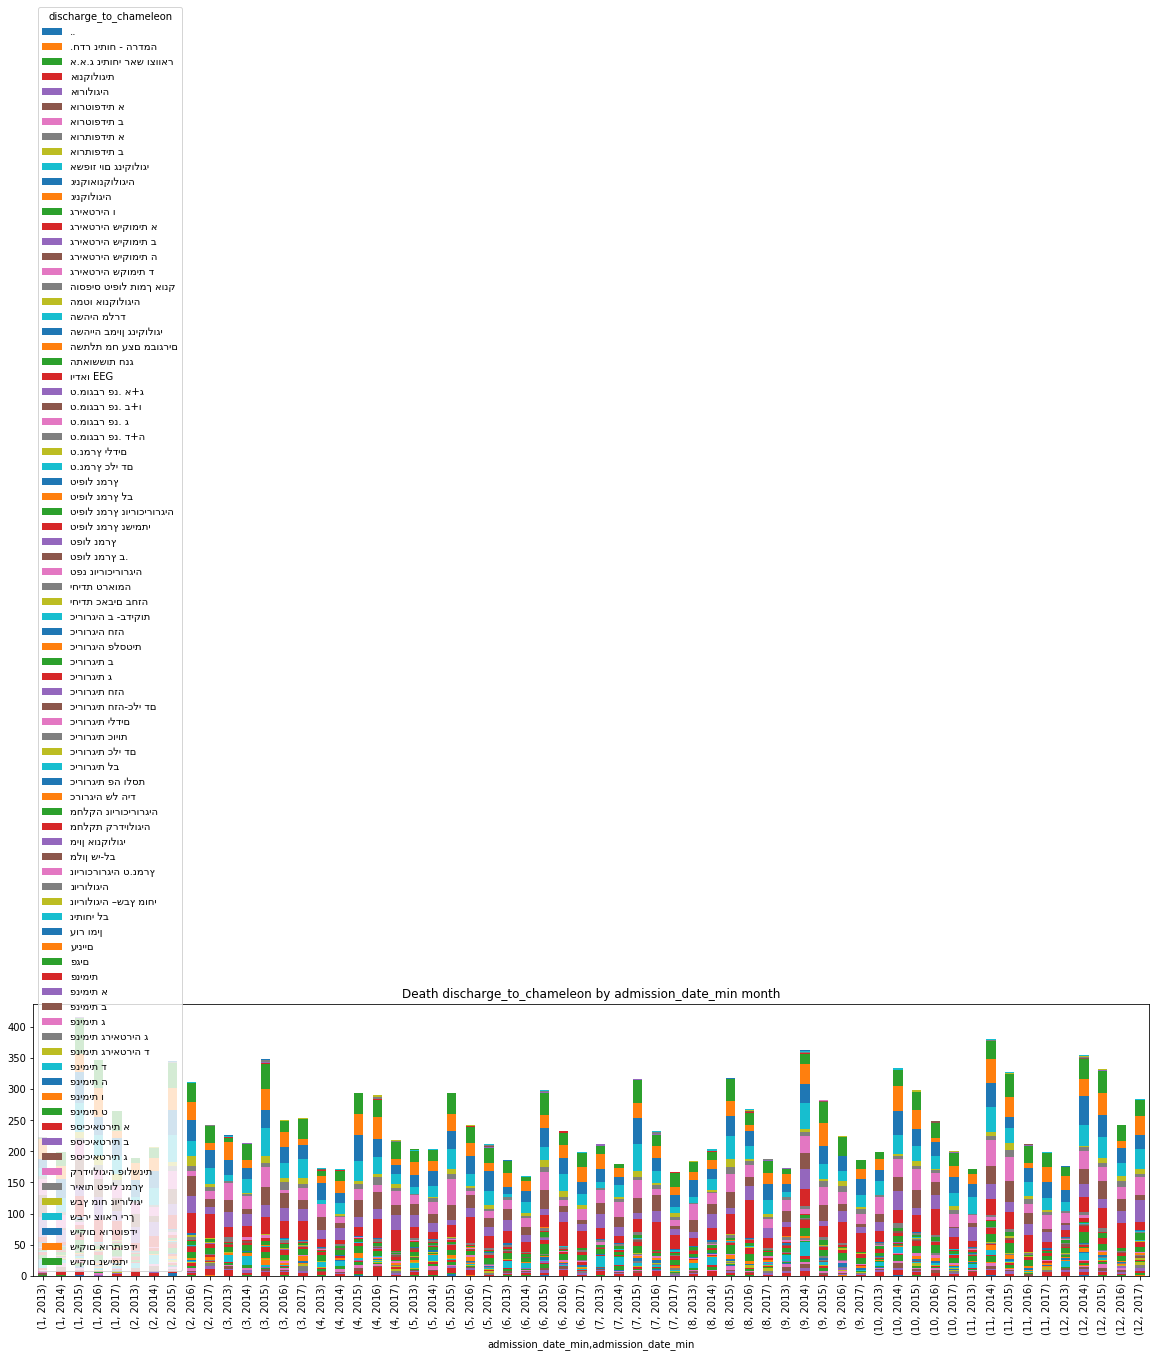

In [137]:
plot_events_by_time(death_data, by_time='admission_date_min',stack_var = 'discharge_to_chameleon')
#death_data.groupby().count()['gender'].plot(kind='bar')

#death_data.head()

## Descriptive Statistics


---- ER data categories : ------
category
Clinical evaluation             10
Labs                            47
Medical background               5
Outcome                         19
Outcome + Medical background     1
demographic                      4
Name: column_name, dtype: int64

---- When was the  data gathered : ------
when (b=before, a=after)
a    20
b    17
Name: column_name, dtype: int64

--- demographic details (all) ---


,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
זכר,5065.00,50.16,23.39,0.00,30.00,51.00,69.00,110.00
נקבה,4926.00,53.58,23.51,0.00,33.00,55.00,73.00,104.00


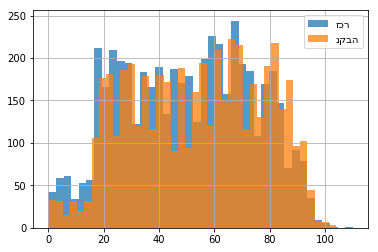

In [3]:
md= pd.read_csv(os.path.abspath("../docs/ER/meta_data.csv"))
md= md.loc[md.is_load==1]

data_timestamp_index = 'rss_timestamp'
#print(md.head())
print('\n---- ER data categories : ------')
print(md.groupby('category').nunique()['column_name'])
print('\n---- When was the  data gathered : ------')
print(md.groupby('when (b=before, a=after)').nunique()['column_name'])

demographic_cols = md.loc[md.category == 'demographic']['column_name']
demographic_data = data[demographic_cols]

tprint('demographic details (all)')

fig, ax = plt.subplots()
groups = demographic_data.groupby('gender')['age_on_date']
for k, v in groups:
    if k != 'לא ידוע':
        v.hist(label=k, alpha=.75, ax=ax, bins = 40)
ax.legend()
pd.options.display.float_format = "{:.2f}".format
groups.describe()

#demographic_data.groupby('gender').plot(kind='bar')
#[])

#demographic_data['gender'].value_counts())


## where were people commited?

In [4]:
tprint('commited units:')
print(fraud_events.fraud_type.value_counts())    
    
nunique=fraud_events.nunique()
ncount=fraud_events.count()
nnunique=pd.concat([ncount,nunique],axis=1)
nnunique.columns=[ 'count','unique vals']
tprint('Number of values in each fraud label column:')
print(nnunique.loc[label_cols].applymap(pprint))#.applymap(pprint))
tprint('Number of values in each rss_data column:')
print(nnunique.loc[relevant_data_cols].applymap(pprint))

f


--- commited units: ---


NameError: name 'fraud_events' is not defined

In [6]:
death_data=data_with_targets[data_with_targets.T_is_dead==True]
death_data.

['T_is_dead',
 'T_release_date',
 'T_total_time_hospital',
 'T_mortality_ER',
 'T_mortality_hospitalization',
 'T_mortality2d',
 'T_mortality30d',
 'T_mortality60d']